# 1. Czym są Wordle?
W Wordlach należy zgadnąć wygrany wyraz w ciągu 6 prób. Wyraz jest pięcioliterowy. Po każdym zgadnięciu kolor liter podkreśli się na inny kolor.

- Wygrany wyraz: Weary
- Wpisaliśmy: <span style="color: green;">W</span><span style="color: orange;">a</span>x<span style="color: orange;">e</span>d

# 2. Jakie są nasze cele?
- znalezienie bazy akceptowalnych w grze słów,

- implementacja gry na język Julii,

- algorytm optymalizujący stworzenie hasła,

- rozsztrzygnięcie, od jakiego słowa najlepiej zaczynać grę w Worlde.

# 3. Teoria informacji
- teoria informacji – dyscyplina zajmująca się problematyką informacji oraz metodami przetwarzania informacji, np. w celu transmisji lub kompresji.
- najpowszechniejszą jednostką informacji jest bit,
- najłatwiej sobie wyobrazić, że jeśli mamy przestrzeń prawdopodobieństwo i dokonamy obserwacji, która podzieli przestrzeń prawdopodobieństwa na pół, to ma ona 1 bit informacji,
- informacja wyraża się wzorem: <strong>I=log2(1/p)</strong>, gdzie p to prawdopodobieństwo zdarzenia,
- entropia to średnia ilość informacji, przypadająca na pojedynczą wiadomość ze źródła informacji,
- entropia wyraża się wzorem: <strong>E=&#931;p(x)*log2(1/p(x))</strong>,

# 4. Optymalizacja - plan
- policzenie entropii dla każdego wygranego wyrazu i znalezienie tego wyrazu z największą, który dostarczy najwięcej informacji
- znalezienienie częstotliwości występowań liter w wyrazach w języku angielskim, co ułatwi nam proces optymalizacji

In [1]:
allowed=open("dozwolone_slowa.txt", "r")
allowed_array=readlines(allowed)

12953-element Vector{String}:
 "aahed"
 "aalii"
 "aargh"
 "aarti"
 "abaca"
 "abaci"
 "aback"
 "abacs"
 "abaft"
 "abaka"
 "abamp"
 "aband"
 "abase"
 ⋮
 "zowee"
 "zowie"
 "zulus"
 "zupan"
 "zupas"
 "zuppa"
 "zurfs"
 "zuzim"
 "zygal"
 "zygon"
 "zymes"
 "zymic"

In [2]:
winning=open("wygrane_slowa.txt", "r")
winning_array=readlines(winning)

2309-element Vector{String}:
 "aback"
 "abase"
 "abate"
 "abbey"
 "abbot"
 "abhor"
 "abide"
 "abled"
 "abode"
 "abort"
 "about"
 "above"
 "abuse"
 ⋮
 "wrote"
 "wrung"
 "wryly"
 "yacht"
 "yearn"
 "yeast"
 "yield"
 "young"
 "youth"
 "zebra"
 "zesty"
 "zonal"

In [3]:
using SparseArrays

In [4]:
using Plots

In [5]:
function words_to_int_arrays(word)
    return [Int8(c) for c in word]
end

words_to_int_arrays (generic function with 1 method)

In [6]:
"""
Symulowanie pojedynczej próby w Wordle. 
Zwraca wektor 5-elementowy o wartościach oznaczających kolejno 0-szary kafelek,1-żółty i 2-zielony.
"""
function wordle_sim(answer,test)
    matrix = [0, 0, 0, 0, 0]
    test = words_to_int_arrays(test)
    answer = words_to_int_arrays(answer)
    copy_1 = copy(test)
    for i in 1:5
        if answer[i] == test[i]
            matrix[i] = 2
            copy_1 = replace(copy_1, copy_1[i] => "0")
        end
    end
    for j in 1:5
        for c in 1:5
            if answer[j]==copy_1[c]
                matrix[c] = 1
                copy_1 = replace(copy_1, copy_1[c] => "0")
            end
        end
    end
    return matrix
end

wordle_sim

In [7]:
"""Dla uproszczenia w wizualizacji każdemu układowi kafelków przyporządkowaliśmy jedną liczbę."""
function individual_id_of_matrix(matrix)
    id = 0
    id += matrix[1]*(3^4)
    id += matrix[2]*(3^3)
    id += matrix[3]*(3^2)
    id += matrix[4]*(3)
    id += matrix[5]
    return id
end

individual_id_of_matrix

In [8]:
allowed_omega=length(allowed_array)

12953

In [9]:
"""Losowy wybór z podanego zbioru. Za pomocą tej funkcji wybieramy losowe słowo"""
function choice(a::Array)
    n = length(a)
    index = rand(1:n)
    return a[index]
end

winning_choice=choice(winning_array)

"actor"

In [10]:
"""Funkcja służąca do określenia ile jest słów, które spełniają warunek poszczególnego wzoru kafelków"""
function how_many_words(answer, test)
    final = spzeros(Int, 243)
    for i in test
        x = wordle_sim(answer, i)
        id_of_one = individual_id_of_matrix(x)
        final[id_of_one+1] += 1
    end
    return final
end


how_many_words

In [11]:
list_of_probability=Vector{Float64}(how_many_words(winning_choice, allowed_array)/allowed_omega)

243-element Vector{Float64}:
 0.14830541187369722
 0.028950822203350574
 0.014668416583030959
 0.05118505365552382
 0.008337836794564965
 0.0037057052420288736
 0.018296919632517564
 0.0020844591986412414
 0.0020844591986412414
 0.07488612676600015
 0.010885509148459815
 0.001544043850845364
 0.024627499420983558
 ⋮
 7.72021925422682e-5
 0.0
 0.0
 0.0001544043850845364
 0.0
 0.0
 0.0
 0.0
 0.0
 7.72021925422682e-5
 0.0
 7.72021925422682e-5

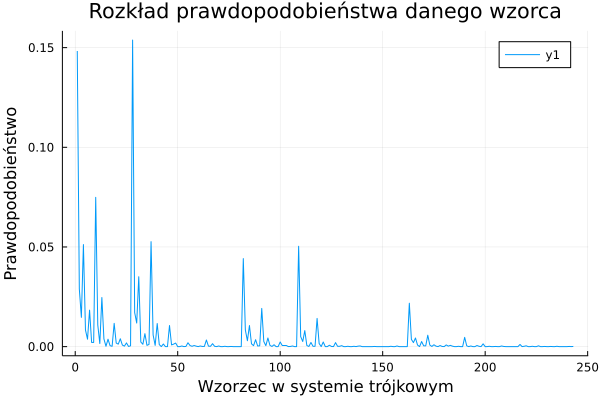

In [12]:
plot(1:243, list_of_probability, title = "Rozkład prawdopodobieństwa danego wzorca")
xlabel!("Wzorzec w systemie trójkowym")
ylabel!("Prawdopodobieństwo")

In [13]:
#Na wykresie jest pokazane ile wyrazów spełnia warunek każdej kobinacji, nie jest ułożone w kolejności

In [14]:
using LinearAlgebra

In [15]:
"""Funkcja wyznaczająca informację"""
function information(probability)
    informations=[]
    for i in probability
        if i==0
            append!(informations, 0)
        else
            #information=log2(1/i)
            append!(informations, log2(1/i))
        end
    end
    return informations
end
list_of_information=information(list_of_probability)

243-element Vector{Any}:
  2.7533568501569463
  5.110251868439231
  6.091143045491526
  4.288133593709886
  6.9061111516590055
  8.076036153101319
  5.7722554049242145
  8.906111151659005
  8.906111151659005
  3.7391577167479837
  6.52144730142368
  9.339070558935111
  5.3435860400576045
  ⋮
 13.660998653822475
  0
  0
 12.660998653822475
  0
  0
  0
  0
  0
 13.660998653822475
  0
 13.660998653822475

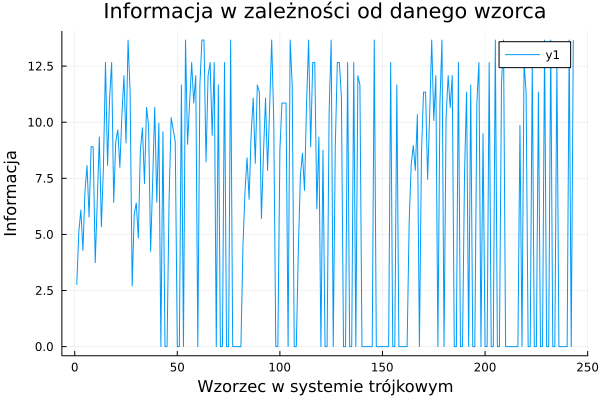

In [16]:
plot(1:243, list_of_information, title = "Informacja w zależności od danego wzorca")
xlabel!("Wzorzec w systemie trójkowym")
ylabel!("Informacja")

In [17]:
to_entropy=list_of_probability.*list_of_information

243-element Vector{Float64}:
 0.4083377216977916
 0.14794599325752422
 0.0893474236581016
 0.21948834807609469
 0.05758202766765788
 0.029927409507362255
 0.10561449324226349
 0.018564425314196952
 0.018564425314196952
 0.2800110387744572
 0.07098927426084604
 0.014419934469134733
 0.13159916210749448
 ⋮
 0.0010546590483920695
 0.0
 0.0
 0.0019549137116996024
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0010546590483920695
 0.0
 0.0010546590483920695

In [18]:
"Zwraca entropię całego układu"
function entropy(information_list)
    return sum(information_list)
end
entropy_of_chosen_word = entropy(to_entropy)

4.869258148514061

In [19]:
"""
Ostateczna funkcja, liczy entropię dla każdego wyrazu. Wynik zwracany jest w postaci słownika wyraz => entropia.
Ostrożnie z wywoływaniem! Funkcja liczy około 3-4 minuty.
"""
function all_entropy(list_of_words)
    D=Dict()
    for i in list_of_words
        probability_list=Vector{Float64}(how_many_words(i, allowed_array)/allowed_omega)
        information_list=information(probability_list)
        to_entropy=probability_list.*information_list
        D[i]=entropy(to_entropy)
    end
    return D
end
#FINAL = all_entropy(allowed_array)

all_entropy

In [20]:
#zapisujemy plik z entropią
#FINAL = sort(collect(FINAL), by=x->x[2])
#using CSV
#CSV.write("list_of_entropy.csv", FINAL)

In [21]:
#teraz zajmiemy się symulacją gry 
"""
Warto nadmienić, że z nieznanego nam powodu funkcja ta działa o wiele lepiej w VS Code niż w Jupyterze, to jest: 
w tym pierwszym po podaniu hasła zwracany jest od razu wzorzec, kiedy to Jupyter domaga się wpisania wszystkich haseł
a następnie dopiero po wszystkim wyświetla wzorce.
"""
function simulate_game()
    answer = choice(winning_array)
    shot = 0
    while shot < 6
        println("Please enter a word:")
        word=readline()
        pattern = wordle_sim(answer, word)
        if length(word) != 5
            println("Word should contain 5 letters")
        else
            if word in allowed_array
                if pattern == [2, 2, 2, 2, 2]
                    return("Congratulations, you won!")
                else 
                    println(pattern)
                    shot = shot + 1
                end
            else println("word is not allowed") 
            end
        end
    end 
    return("Maybe next time!", answer)
end

simulate_game

In [22]:
#teraz zajmiemy się rozegraniem gry z algorytmem i postaramy się sprawdzić w około ile ruchów nasz algorytm jest w stanie zgadnąć losowe hasło.

In [36]:
#najprostszy model - zaczyna od największej entropii, a następnie sprawdza entropię **wszystkich** słów w allowed_array 
#w zależności od słów, które spełniają wszystkie wzorce
function next_step_entropy(list_of_possible_words)
    D=Dict()
    for i in allowed_array
    probability_list=Vector{Float64}(how_many_words(i, list_of_possible_words)/length(list_of_possible_words))
    information_list=information(probability_list)
    to_entropy=probability_list.*information_list
    D[i]=entropy(to_entropy)
    end
    return D
end


    
function computer_simulation()
    answer = choice(winning_array)
    word_1 = "tares" #nasze "najlepsze" słowo
    pattern_1 = wordle_sim(answer, word_1)
    #pierwsza próba
    if pattern_1 == [2, 2, 2, 2, 2]
        return 1
    end
    list_of_words_fitting_pattern = []    
    for i in allowed_array
        if wordle_sim(i, word_1) == pattern_1
            push!(list_of_words_fitting_pattern, i)
        end
    end      
    j = 2
    # próby o 2 do 5
    while j < 6
        entropy_new = next_step_entropy(list_of_words_fitting_pattern)
        entropy_new = sort(collect(entropy_new), by=x->x[2])
        if last(entropy_new)[2] == 0.0
            pattern = wordle_sim(answer, list_of_words_fitting_pattern[1])
            if pattern == [2, 2, 2, 2, 2]
                return j
            end
        end
        word = last(entropy_new)[1]
        pattern = wordle_sim(answer, word)
        if pattern == [2, 2, 2, 2, 2]
            return j
        end
        list_of_words_fitting_pattern_new = []
        for i in list_of_words_fitting_pattern
            if wordle_sim(i, word) == pattern
                push!(list_of_words_fitting_pattern_new, i)
            end
        end
        list_of_words_fitting_pattern = copy(list_of_words_fitting_pattern_new)
        j = j+1
    end
    #próba 6
    pattern = wordle_sim(answer,list_of_words_fitting_pattern[1])
    if pattern == [2, 2, 2, 2, 2]
        return 6
    end
    return 7
end
computer_simulation()

4

In [42]:
list_of_final_guesses = []

Any[]

In [40]:
#to zajmuje sporo czasu
for i in 1:100
    push!(list_of_final_guesses, computer_simulation())
end
list_of_final_guesses

100-element Vector{Any}:
 7
 4
 5
 5
 4
 2
 6
 4
 4
 4
 5
 5
 5
 ⋮
 4
 5
 3
 5
 4
 4
 5
 4
 4
 3
 5
 4

In [41]:
using Statistics
mean(list_of_final_guesses)

4.54